# Introduction

This year we have a unique opportunity: we have a real data science project with real stakeholders who are looking for answers to a few questions about their data.

In particular, a research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a MineCraft serverLinks to an external site., and players' actions are recorded as they navigate through the world. But running this project is not simple: they need to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract.

## Question to Answer

Can player attributes like experience, gender, age, played hours, and duration of play predict whether a player subscribes to newsletters?

## Methodology

In [13]:
library(tidyverse)
library(tidymodels)
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [14]:
players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [15]:
sessions <- read_csv("data/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [16]:
players <- players |> mutate(subscribe = as_factor(subscribe))
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Count missing values per column - data cleaning

In [17]:
players |> summarize(across(everything(), ~ sum(is.na(.))))

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


In [23]:
players_clean <- players |> 
    clean_names() |>
    mutate(age = replace(age, is.na(age), mean(age, na.rm=TRUE)))

In [24]:
players_clean |> summarize(across(everything(), ~ sum(is.na(.))))

experience,subscribe,hashed_email,played_hours,name,gender,age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0


In [25]:
head(players_clean)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [26]:
summary(players_clean)

  experience        subscribe   hashed_email        played_hours    
 Length:196         FALSE: 52   Length:196         Min.   :  0.000  
 Class :character   TRUE :144   Class :character   1st Qu.:  0.000  
 Mode  :character               Mode  :character   Median :  0.100  
                                                   Mean   :  5.846  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
     name              gender               age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.50  
                                       Mean   :21.14  
                                       3rd Qu.:22.25  
                                       Max.   :58.00  

Age Distribution

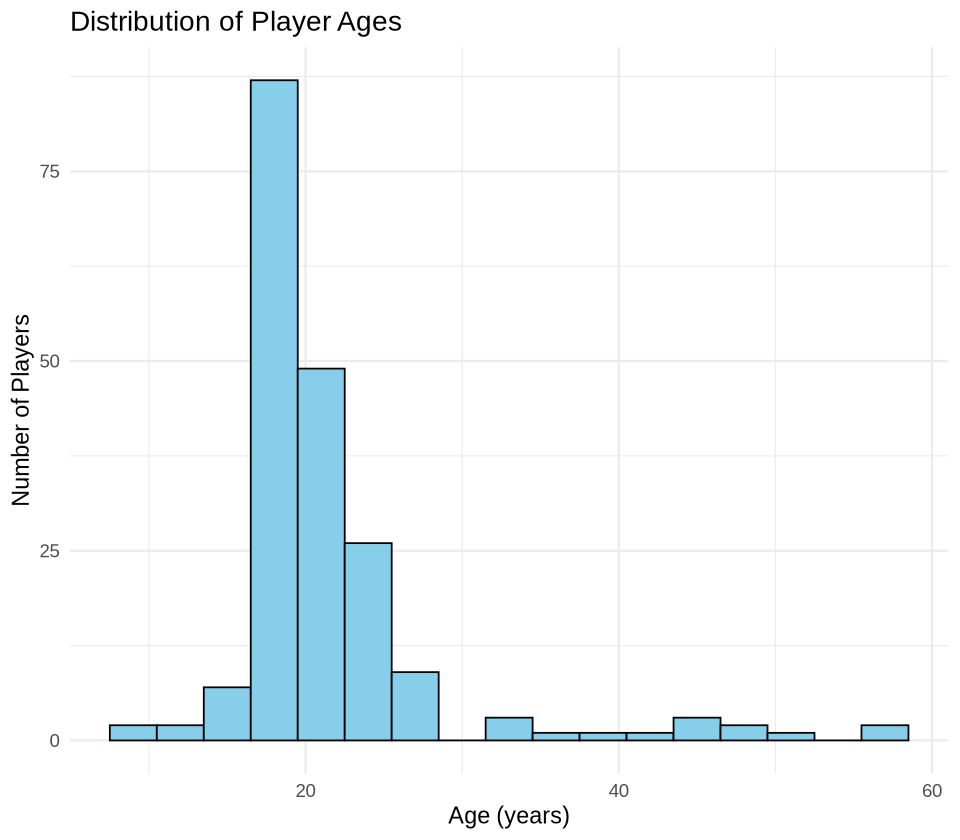

In [36]:
options(repr.plot.width = 8, repr.plot.height = 7)
theme_set(theme_minimal(base_size = 14))
age_plot <- players_clean |> 
    ggplot(aes(x=age)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Age (years)",
        y="Number of Players",
        title="Distribution of Player Ages"
    )
age_plot

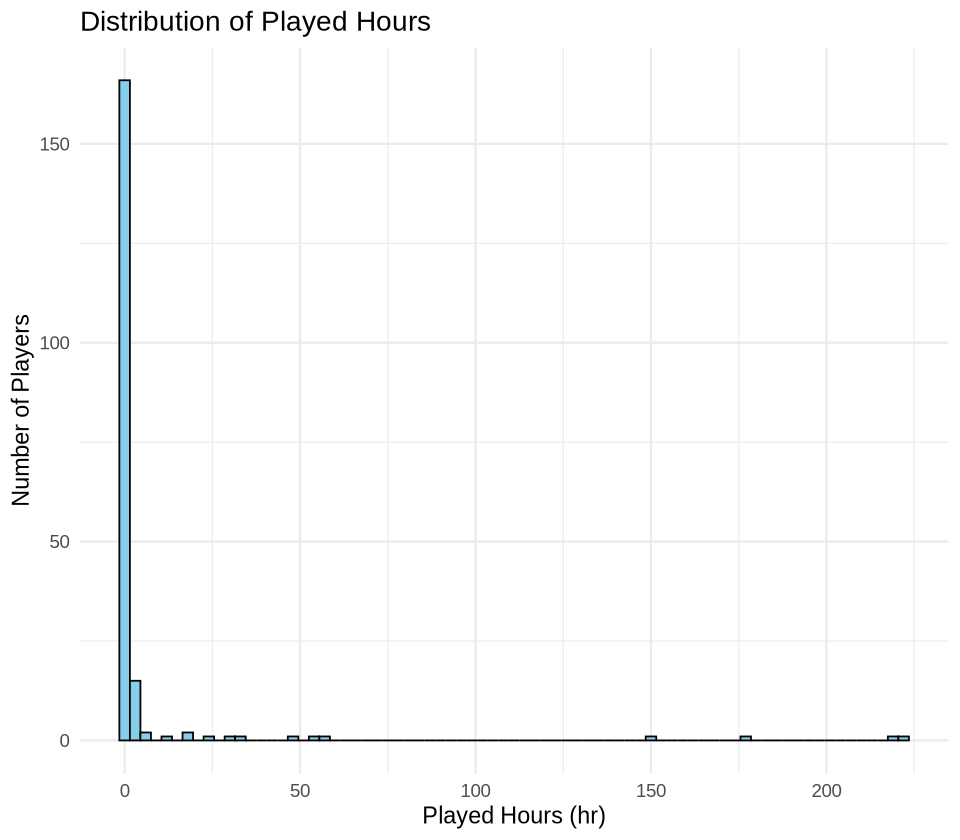

In [39]:
options(repr.plot.width = 8, repr.plot.height = 7)
theme_set(theme_minimal(base_size = 14))
played_hours_plot <- players_clean |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    )
played_hours_plot

Subscription by Experience Level

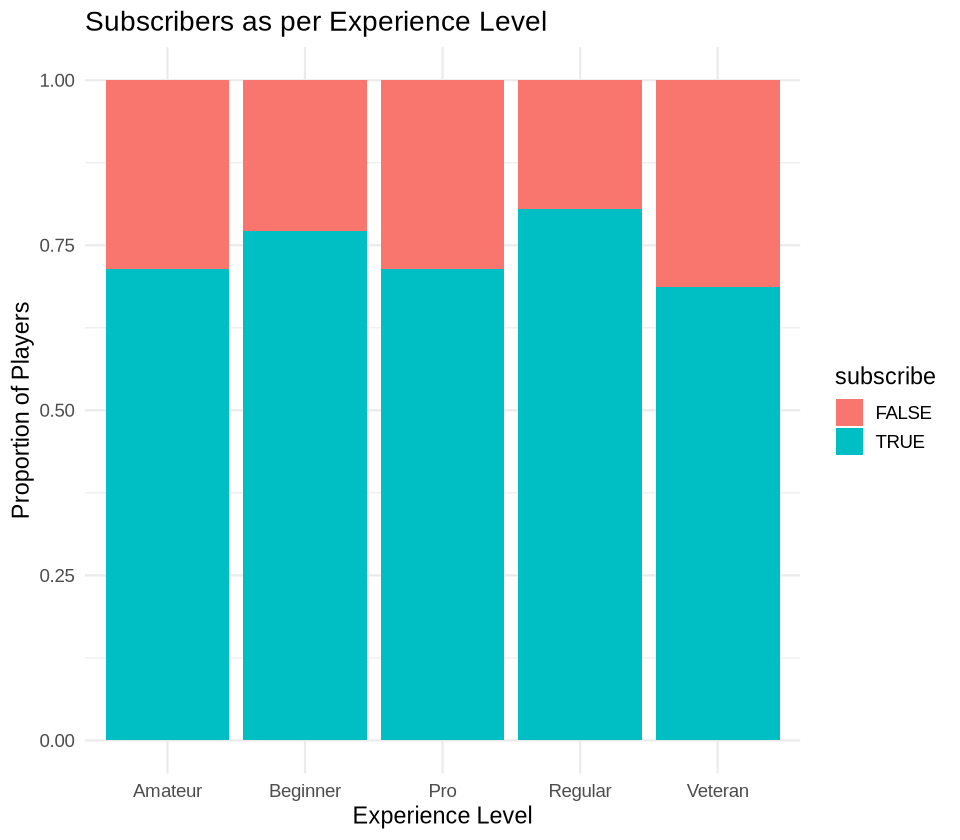

In [42]:
subscription_plot <- players_clean |> 
    ggplot(aes(x=experience, fill=subscribe)) +
    geom_bar(position="fill") +
    labs(
        x="Experience Level",
        y="Proportion of Players",
        title="Subscribers as per Experience Level"
    )
subscription_plot

Relation between age and played hours

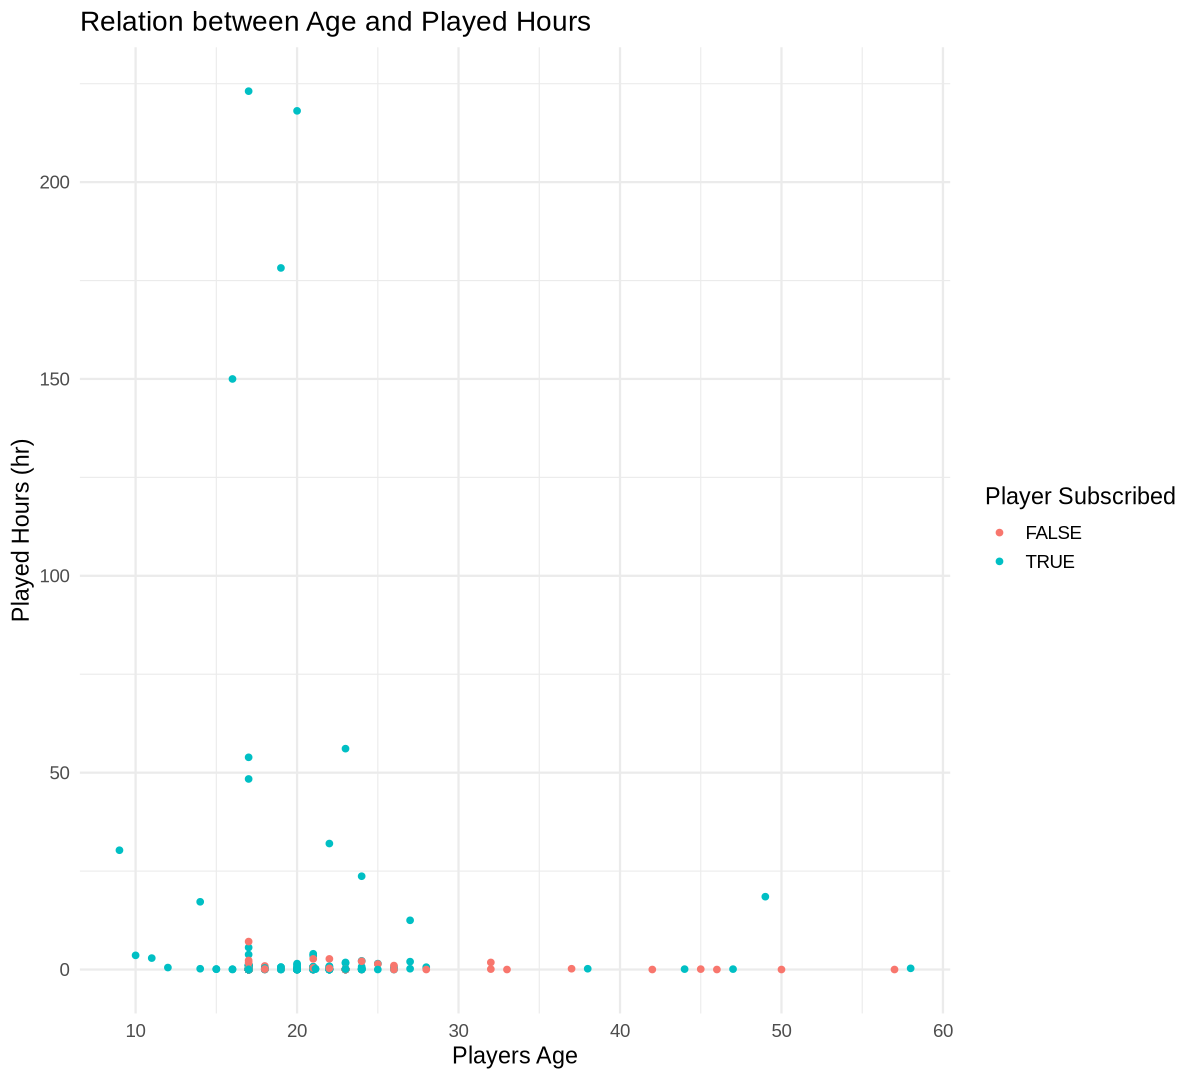

In [48]:
options(repr.plot.width = 10, repr.plot.height = 9)
age_played_time_plot <- players_clean |>
    ggplot(aes(x=age, y=played_hours, color=subscribe)) +
    geom_point() +
    labs(
        x="Players Age",
        y="Played Hours (hr)",
        title="Relation between Age and Played Hours",
        color="Player Subscribed"
    )
age_played_time_plot